# Overview

Generally speaking,  a topic model is a probability distribution of words over a document. But what does this mean? In topic modeling, we are starting from the assumption that there exist a number of topics $N$ -- a topic is a random variable which generates words from a vocabulary with a certain probability. A document is assumed to be produced from a mixture of samples from one or many topics. A document would be generated as follow:

Given $N$ topics and $W = { w_n }$ weights for each topic.


```
  for i in lengthOfDocument
    n = selectTopicFrom(W)
    doc[i] = selectAWord(topic[n])
```

Notice that a document here is expressed as a **bag-of-words**, and therefore the ordering of words is not taken into account.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import scipy.stats as ss

In [67]:
n = 10
w = random.random(size=n)
w = w / sum(w)

topics = []
for i in range(n):
    mu = random.uniform(-5,5)
    t = ss.norm(mu,1)
    topics.append(t)

So, what we observe from a document, is (more or less) a distribution over words:

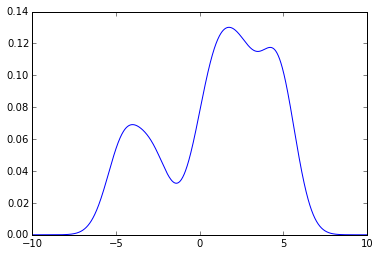

In [85]:
x = linspace(-10,10,1000)
y = np.zeros(x.shape)

for ti,wi in zip(topics,w):
    y += wi * ti.pdf(x)
plot(x,y);

But in reality, the document is generated by a more complicated process which we cannot observe directly (a mixture of distributions):

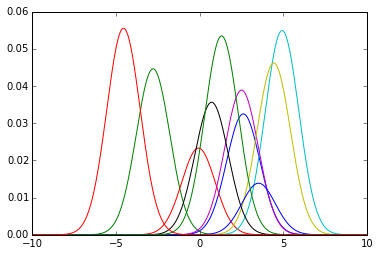

In [84]:
for ti,wi in zip(topics,w):
    yi = wi * ti.pdf(x)
    plot(x,yi)

What our topic modeling tools are trying to do is discover:
 - The weights of each topic
 - The distributions of each topic

See the examples using [gensim](BasicTopicModelingExample-gensim.ipynb) and [scikit](BasicTopicModelingExample-scikit.ipynb) to see how this works in practice. 

# Issues

## Preprocessing

Traditionally, [data preprocessing](DataPreProcessing.ipynb) needs to take place before applying topic modeling. In these examples, the preprocessing transforms a sentence from this format:

```
Hoe kan je, binnen de context van mondiale veranderingsprocessen, inclusieve ontwikkeling bevorderen? Is het opportuun om te blijven focussen op Nederland, in deze tijden van massale migratie, wereldwijde instabiliteit en economische onzekerheid? 2015 is uitgeroepen tot 'het Europees Jaar voor Ontwikkeling'. Hoe kan Nederland bijdragen aan inclusieve mondiale ontwikkeling? 
```

to a bag-of-words like this:

```
[u'context', u'mondiale', u'veranderingsprocessen', u'inclusieve', u'ontwikkeling', u'bevorderen', u'opportuun', u'focussen', u'nederland', u'tijden', u'massale', u'migratie', u'wereldwijde', u'instabiliteit', u'economische', u'onzekerheid', u'uitgeroepen', u'europees', u'jaar', u'ontwikkeling', u'nederland', u'bijdragen', u'inclusieve', u'mondiale', u'ontwikkeling']
```

In this case the preprocessing involves the following:
 - Stop words have been removed
 - Word set is limited to the following categories: foreign word, adjectives, Nouns, adverb and Verb forms (but not modal verbs).

**The problem is that preprocessing implies/requires a-priori knowledge of what we are looking for.**

## Number of topics

In the example above, we assumed that there are 10 topics present in the corpus. But there is no guarantee that exactly 10 topics exist in the data. 

**There is a paper which addresses this issue and attempts to determine automatically the number of topics present in a given data set.**

## Topic quality

Determining whether a topic is *interesting* or *useful* seems like a subjective question. **It would be interesting to idenfify an objective measure of topic quality**.

## Visualizing topics

In the surveyed literature, it is not exactly clear how to visualize topics obtained from topic modeling. One possibility is to come up with some way to measure the distance between two topics. **What is the correct way of visualizing is still an open question.**

## Usage of priors

Sometimes it may be useful to work on different splits of a data set. In such cases, a different topic model needs to be trained for different splits of the data. **It would be interesting to investigate whether a topic model trained on one split can be used as a starting point for another split**.

